In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
valorant = pd.read_csv('valorant champions istanbul.csv')

#convertendo tudo pra string
valorant['Player'] = valorant['Player'].astype('|S')
valorant['Team'] = valorant['Team'].astype('|S')
valorant['Nationality'] = valorant['Nationality'].astype('|S')
valorant['KAST'] = valorant['KAST'].astype('|S')
valorant['Role'] = valorant['Role'].astype('|S')
valorant['Rank'] = valorant['Rank'].astype('|S')
valorant['Prize'] = valorant['Prize'].astype('|S')

#tirando o "b"
valorant['Player'] = valorant['Player'].str.decode('utf-8')
valorant['Team'] = valorant['Team'].str.decode('utf-8')
valorant['Nationality'] = valorant['Nationality'].str.decode('utf-8')
valorant['KAST'] = valorant['KAST'].str.decode('utf-8')
valorant['Role'] = valorant['Role'].str.decode('utf-8')
valorant['Rank'] = valorant['Rank'].str.decode('utf-8')
valorant['Prize'] = valorant['Prize'].str.decode('utf-8')

#arrumando as strings pra converter
valorant['KAST'] = valorant['KAST'].str.replace(r'%', '').astype(int)
valorant['Prize'] = valorant['Prize'].str.replace(r'\t', '')
valorant['Prize'] = valorant['Prize'].str.replace(r'$', '')
valorant['Prize'] = valorant['Prize'].str.replace(r',', '')
valorant['Rank'] = valorant['Rank'].str.replace(r',', '.')

#convertendo para float
valorant['Rank'] = valorant['Rank'].astype(float)
valorant['Prize'] = valorant['Prize'].astype(float)

valorant.dtypes

<ipython-input-3-ccb7db6465b6>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  valorant['Prize'] = valorant['Prize'].str.replace(r'\t', '')
<ipython-input-3-ccb7db6465b6>:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valorant['Prize'] = valorant['Prize'].str.replace(r'$', '')


Player            object
Team              object
Nationality       object
Kill               int64
Death              int64
K/D              float64
KAST               int64
Prize            float64
Role              object
HS %             float64
Rounds Played      int64
Rounds Win         int64
Rounds Lose        int64
Rank             float64
dtype: object

In [ ]:
valorant.head(10)

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76,60000.0,Initiator,25.50,222,155,67,1.0
1,saadhak,LOUD,Argentina,150,143,1.05,76,60000.0,Initiator,22.50,222,155,67,1.0
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1.0
3,Less,LOUD,Brazil,176,134,1.31,73,60000.0,Sentinel,26.50,222,155,67,1.0
4,aspas,LOUD,Brazil,166,158,1.05,71,60000.0,Duelist,26.25,222,155,67,1.0
5,yay,OPTC,United States,334,236,1.42,71,30000.0,Duelist,28.60,365,181,184,2.0
6,Marved,OPTC,Canada,240,252,0.95,73,30000.0,Controller,30.80,365,181,184,2.0
7,Victor,OPTC,United States,247,254,0.97,69,30000.0,Duelist,25.40,365,181,184,2.0
8,crashies,OPTC,United States,238,246,0.97,72,30000.0,Initiator,26.60,365,181,184,2.0
9,FNS,OPTC,Canada,188,247,0.76,67,30000.0,Sentinel,20.40,365,181,184,2.0


In [ ]:
#renomeando as colunas p ficar mais facil
valorant.columns = ['player', 'team', 'nation', 'kill','death','kd','kast','prize','role','hs %', 'rounds played', 'rounds w', 'rounds l', 'rank']
valorant.head()

,player,team,nation,kill,death,kd,kast,prize,role,hs %,rounds played,rounds w,rounds l,rank
0,Sacy,LOUD,Brazil,147,123,1.20,76,60000.0,Initiator,25.50,222,155,67,1.0
1,saadhak,LOUD,Argentina,150,143,1.05,76,60000.0,Initiator,22.50,222,155,67,1.0
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1.0
3,Less,LOUD,Brazil,176,134,1.31,73,60000.0,Sentinel,26.50,222,155,67,1.0
4,aspas,LOUD,Brazil,166,158,1.05,71,60000.0,Duelist,26.25,222,155,67,1.0


In [ ]:
#vendo o menor kd
valorant.sort_values('kd',ascending=True)[['player', 'kd']].head(5)

,player,kd
19,ANGE1,0.59
39,Shyy,0.61
33,dimasick,0.73
38,Tacolilla,0.75
9,FNS,0.76


In [ ]:
#media de todos os kds
media_kd = valorant['kd'].mean()
media_kd

1.0025

<Axes: ylabel='Frequency'>

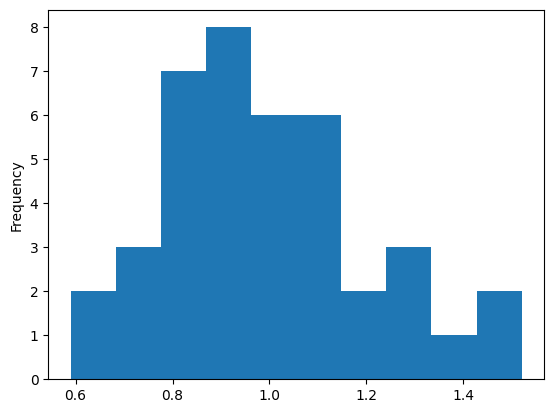

In [ ]:
#vendo os kd por grafico do pandas
valorant.kd.plot(kind='hist')

<Axes: xlabel='kd', ylabel='Count'>

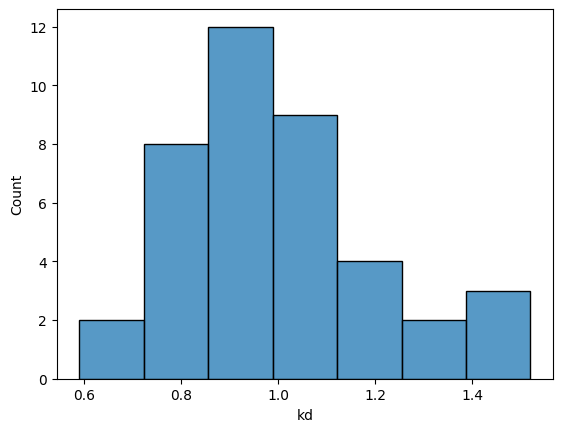

In [ ]:
#vendo kd por grafico do sns
sns.histplot(valorant['kd'])

In [ ]:
#vendo jogadores com mais kills

valorant.sort_values('kill',ascending=False)[['player', 'kill']].head(5)

,player,kill
5,yay,334
7,Victor,247
6,Marved,240
8,crashies,238
11,BuZz,235


In [ ]:
#media de kills por jogador
def media_kill_round(jogador,num_kill,num_round):

  media_round = num_kill / num_round
  return media_round

jogador = str(input('qual o nome do jogador? '))

num_kill = valorant[valorant['player']==jogador]['kill']
num_round = valorant[valorant['player']==jogador]['rounds played']

media_kill_round(jogador,num_kill,num_round)

qual o nome do jogador? yay


5    0.915068
dtype: float64

In [ ]:
#criando a coluna de media de kills
valorant['kill/round'] = valorant['kill'] / valorant['rounds played']
valorant.head()

,player,team,nation,kill,death,kd,kast,prize,role,hs %,rounds played,rounds w,rounds l,rank,kill/round
0,Sacy,LOUD,Brazil,147,123,1.20,76,60000.0,Initiator,25.50,222,155,67,1.0,0.662162
1,saadhak,LOUD,Argentina,150,143,1.05,76,60000.0,Initiator,22.50,222,155,67,1.0,0.675676
2,pANcada,LOUD,Brazil,169,137,1.23,81,60000.0,Controller,36.75,222,155,67,1.0,0.761261
3,Less,LOUD,Brazil,176,134,1.31,73,60000.0,Sentinel,26.50,222,155,67,1.0,0.792793
4,aspas,LOUD,Brazil,166,158,1.05,71,60000.0,Duelist,26.25,222,155,67,1.0,0.747748


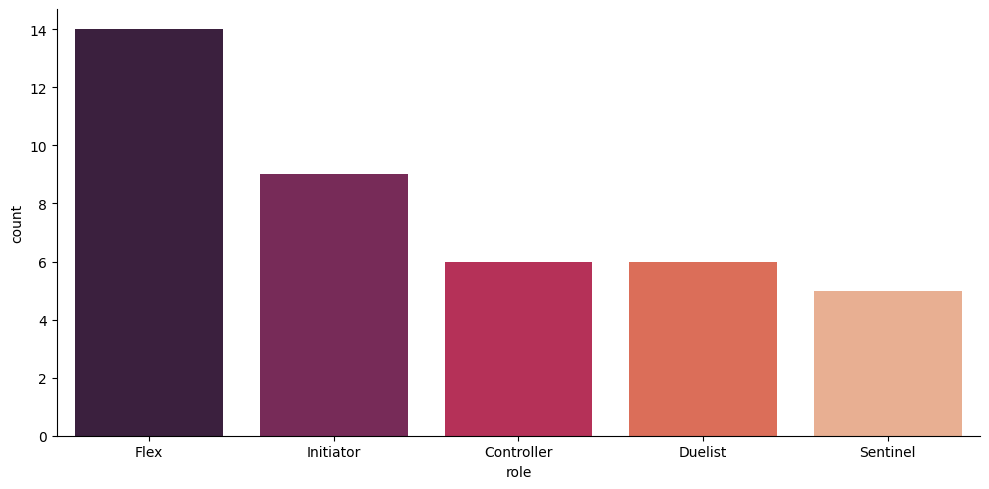

In [ ]:
#funcoes mais comuns dos jogadores
funcoes_valorant = valorant['role'].value_counts().to_frame()

sns.catplot(x = 'role',
            kind= 'count',
            data = valorant,
            aspect = 2,
            palette = "rocket",
            order = funcoes_valorant.index)

In [ ]:
#probabilidade de um jogador ser dos US
j_us = valorant[valorant['nation']=='United States']['nation'].value_counts()
n_jogadores = len(valorant['player'])

p_us = j_us/n_jogadores * 100
p_us

United States    15.0
Name: nation, dtype: float64